# 로지스틱 회귀 하이퍼 파라미터 튜닝 

---

## 로지스틱 회귀 파라미터 -> C

**C**값이 클수록 모델은 지도 데이터를 완전히 분류하라 수있는 식별 경계선을 학습
scikit-learn 로지스틱 회귀 C 기본값 1.0이다.

## 로지스틱 회귀 파라미터 -> penalty

**penalty**는 모델의 복잡성에 대한 패널티 L1, L2
- L1 : 데이터의 특징량을 중심으로 실별 경계선의 일반화를 도모
- L2 : 데이터 전체의 가중치를 줄임으로써 식별 경계선의 일반화를 도모

## 로지스틱 회귀 파라미터 -> mult_class

**mult_class** 는 다항 분류에서 모델의 동작을 결정
- ovr : 클래스에 대해 '속하는/속하지 않는' 두 값으로 답하는 문제에 적합하다. 
- multnormail : 각 클래스로 분류될 확률도 고려되어 '속하는/속하지않는' 그리고 '속할 가능성이 얼마인가' 를 다루는 문제에 적합.

## 로지스틱 회귀 파라미터 -> random_state

모델은 학습시 데이터를 임의의 순서로 처리해 나간다.   
그리고 **random_state** 는 그 순서를 제어
로지스틱 회귀 모델은 처리 순서 때문에 경계선이 변경되는 경우가 있다.
random_state 값을 고정시켜 동일한 학습 결과를 보전할 경우.

In [18]:
import matplotlib.pyplot as plt 

# sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
%matplotlib inline

In [19]:
# 데이터 생성 -1 
X, y = make_classification(
                        n_samples= 1250, n_features=4, 
                        n_informative=2, n_redundant=2, 
                        random_state=42
                        )
# 데이터 생성 -2 
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 42)

In [33]:
print(train_X,train_y)

[[-0.81455417  0.88143187 -1.09546086 -1.22309015]
 [-1.07499797 -1.71767614 -1.40258857 -0.73732044]
 [ 0.63291613  1.04880568  0.82522693  0.42268967]
 ...
 [ 0.25362208 -1.52023728  0.35973771  0.75999282]
 [-0.66087654  1.01283219 -0.89324306 -1.08294241]
 [ 0.91391116 -0.88899824  1.22758564  1.34185908]] [0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1
 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1
 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1
 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0
 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1
 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0
 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1
 0 1 1 0 0 1 

In [34]:
print(test_X, test_y )

[[-0.79163596  0.98533855 -1.06656604 -1.22785037]
 [-0.19730452  1.87683097 -0.29024974 -0.80250993]
 [-0.94796607 -1.45258387 -1.23777544 -0.66909708]
 ...
 [-0.53311695 -0.46699238 -0.70133866 -0.48278528]
 [ 0.76636587  0.99149775  1.00339406  0.59656134]
 [-0.24130232  0.20550366 -0.32368511 -0.34540089]] [0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0
 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1
 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0
 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1
 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0
 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1
 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0]


In [20]:
# # 데이터 생성 -2 
# train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 42)

In [21]:
# C값의 범위를 설정(0.00001 ~ 10000) 
C_list = [10 **i for i in range(-5, 5)]
C_list

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

In [22]:
# 그래프 작성용 빈 리스트 선언 
train_accuracy = []
test_accuracy  = []

In [ ]:
# 여기가 문제 

In [23]:
for c in C_list:
    model = LogisticRegression(C=c, random_state=42) # 이게문제인것같아 
    model.fit(train_X, train_y)
    print('train_score >>> ', model.score(train_X, train_y))
    print('test_score >>> ',  model.score(test_X, test_y))
    
    train_accuracy.append(model.score(train_X, train_y))
    test_accuracy.append(model.score(test_X, test_y))

In [31]:
train_accuracy, len(train_accuracy)

([0.6232657417289221,
  0.9295624332977588,
  0.9295624332977588,
  0.927427961579509,
  0.9306296691568837,
  0.9306296691568837,
  0.9306296691568837,
  0.9306296691568837,
  0.9306296691568837,
  0.9306296691568837],
 10)

In [25]:
test_accuracy

[0.5942492012779552,
 0.9329073482428115,
 0.9297124600638977,
 0.9201277955271565,
 0.9265175718849841,
 0.9265175718849841,
 0.9265175718849841,
 0.9265175718849841,
 0.9265175718849841,
 0.9265175718849841]

# 정확도 시각화 

- semilogx()
    - x 축을 로그 스케일로 표시 할 때 사용
    - x의 스케일을 10의 x승 스케일로 변경

In [26]:
# train_accuracy= train_accuracy[1:]

In [27]:
# test_accuracy= test_accuracy[1:]

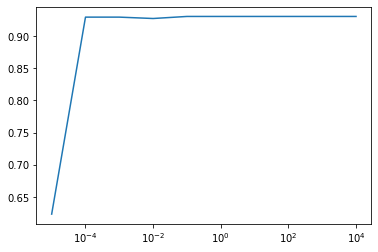

In [28]:
plt.semilogx(C_list, train_accuracy, label='accuracy of train_data')

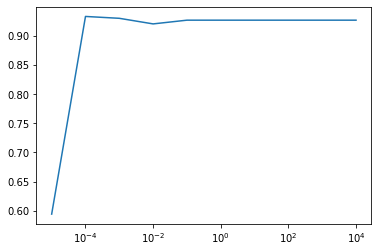

In [29]:
plt.semilogx(C_list, test_accuracy, label='accuracy of test_data')

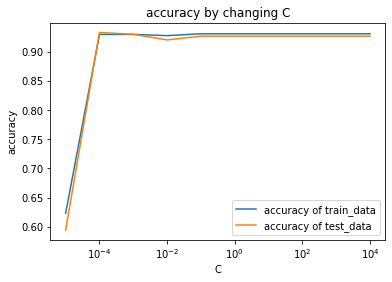

In [35]:
# 정확도 시각화
# semilogx()는 x의 스케일을 10의 x승 스케일로 변경
plt.semilogx(C_list, train_accuracy, label='accuracy of train_data')
plt.semilogx(C_list, test_accuracy, label='accuracy of test_data')
plt.title('accuracy by changing C')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend()
plt.show()

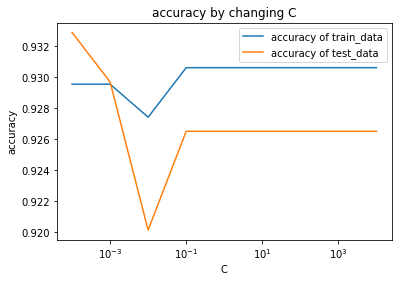

In [30]:
plt.semilogx(C_list[1:], train_accuracy[1:], label='accuracy of train_data')
plt.semilogx(C_list[1:], test_accuracy[1:], label='accuracy of test_data')
plt.title('accuracy by changing C')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend()
plt.show()